In [12]:
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

import warnings

plt.style.use('seaborn')
plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [31]:
df = yf.download('INDY.jk', 
                 start='2009-01-01', 
                 end='2019-12-31',
                 progress=False)

df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [32]:
df['simple_rtn'] = df.adj_close.pct_change()

In [33]:
df.head()

,adj_close,simple_rtn
Date,,
2009-01-05,748.167297,NaN
2009-01-06,734.807007,-0.017857
2009-01-07,728.127075,-0.009091
2009-01-08,701.406799,-0.036697
2009-01-09,741.487183,0.057143


In [34]:
df_rolling = df[['simple_rtn']].rolling(window=21) \
                               .agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [35]:
df_outliers = df.join(df_rolling)

In [36]:
def indentify_outliers(row, n_sigmas=3):
    '''
    Function for identifying the outliers using the 3 sigma rule. 
    The row must contain the following columns/indices: simple_rtn, mean, std.
    
    Parameters
    ----------
    row : pd.Series
        A row of a pd.DataFrame, over which the function can be applied.
    n_sigmas : int
        The number of standard deviations above/below the mean - used for detecting outliers
        
    Returns
    -------
    0/1 : int
        An integer with 1 indicating an outlier and 0 otherwise.
    '''
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0 

In [37]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, 
                                           axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, 
                           ['simple_rtn']]

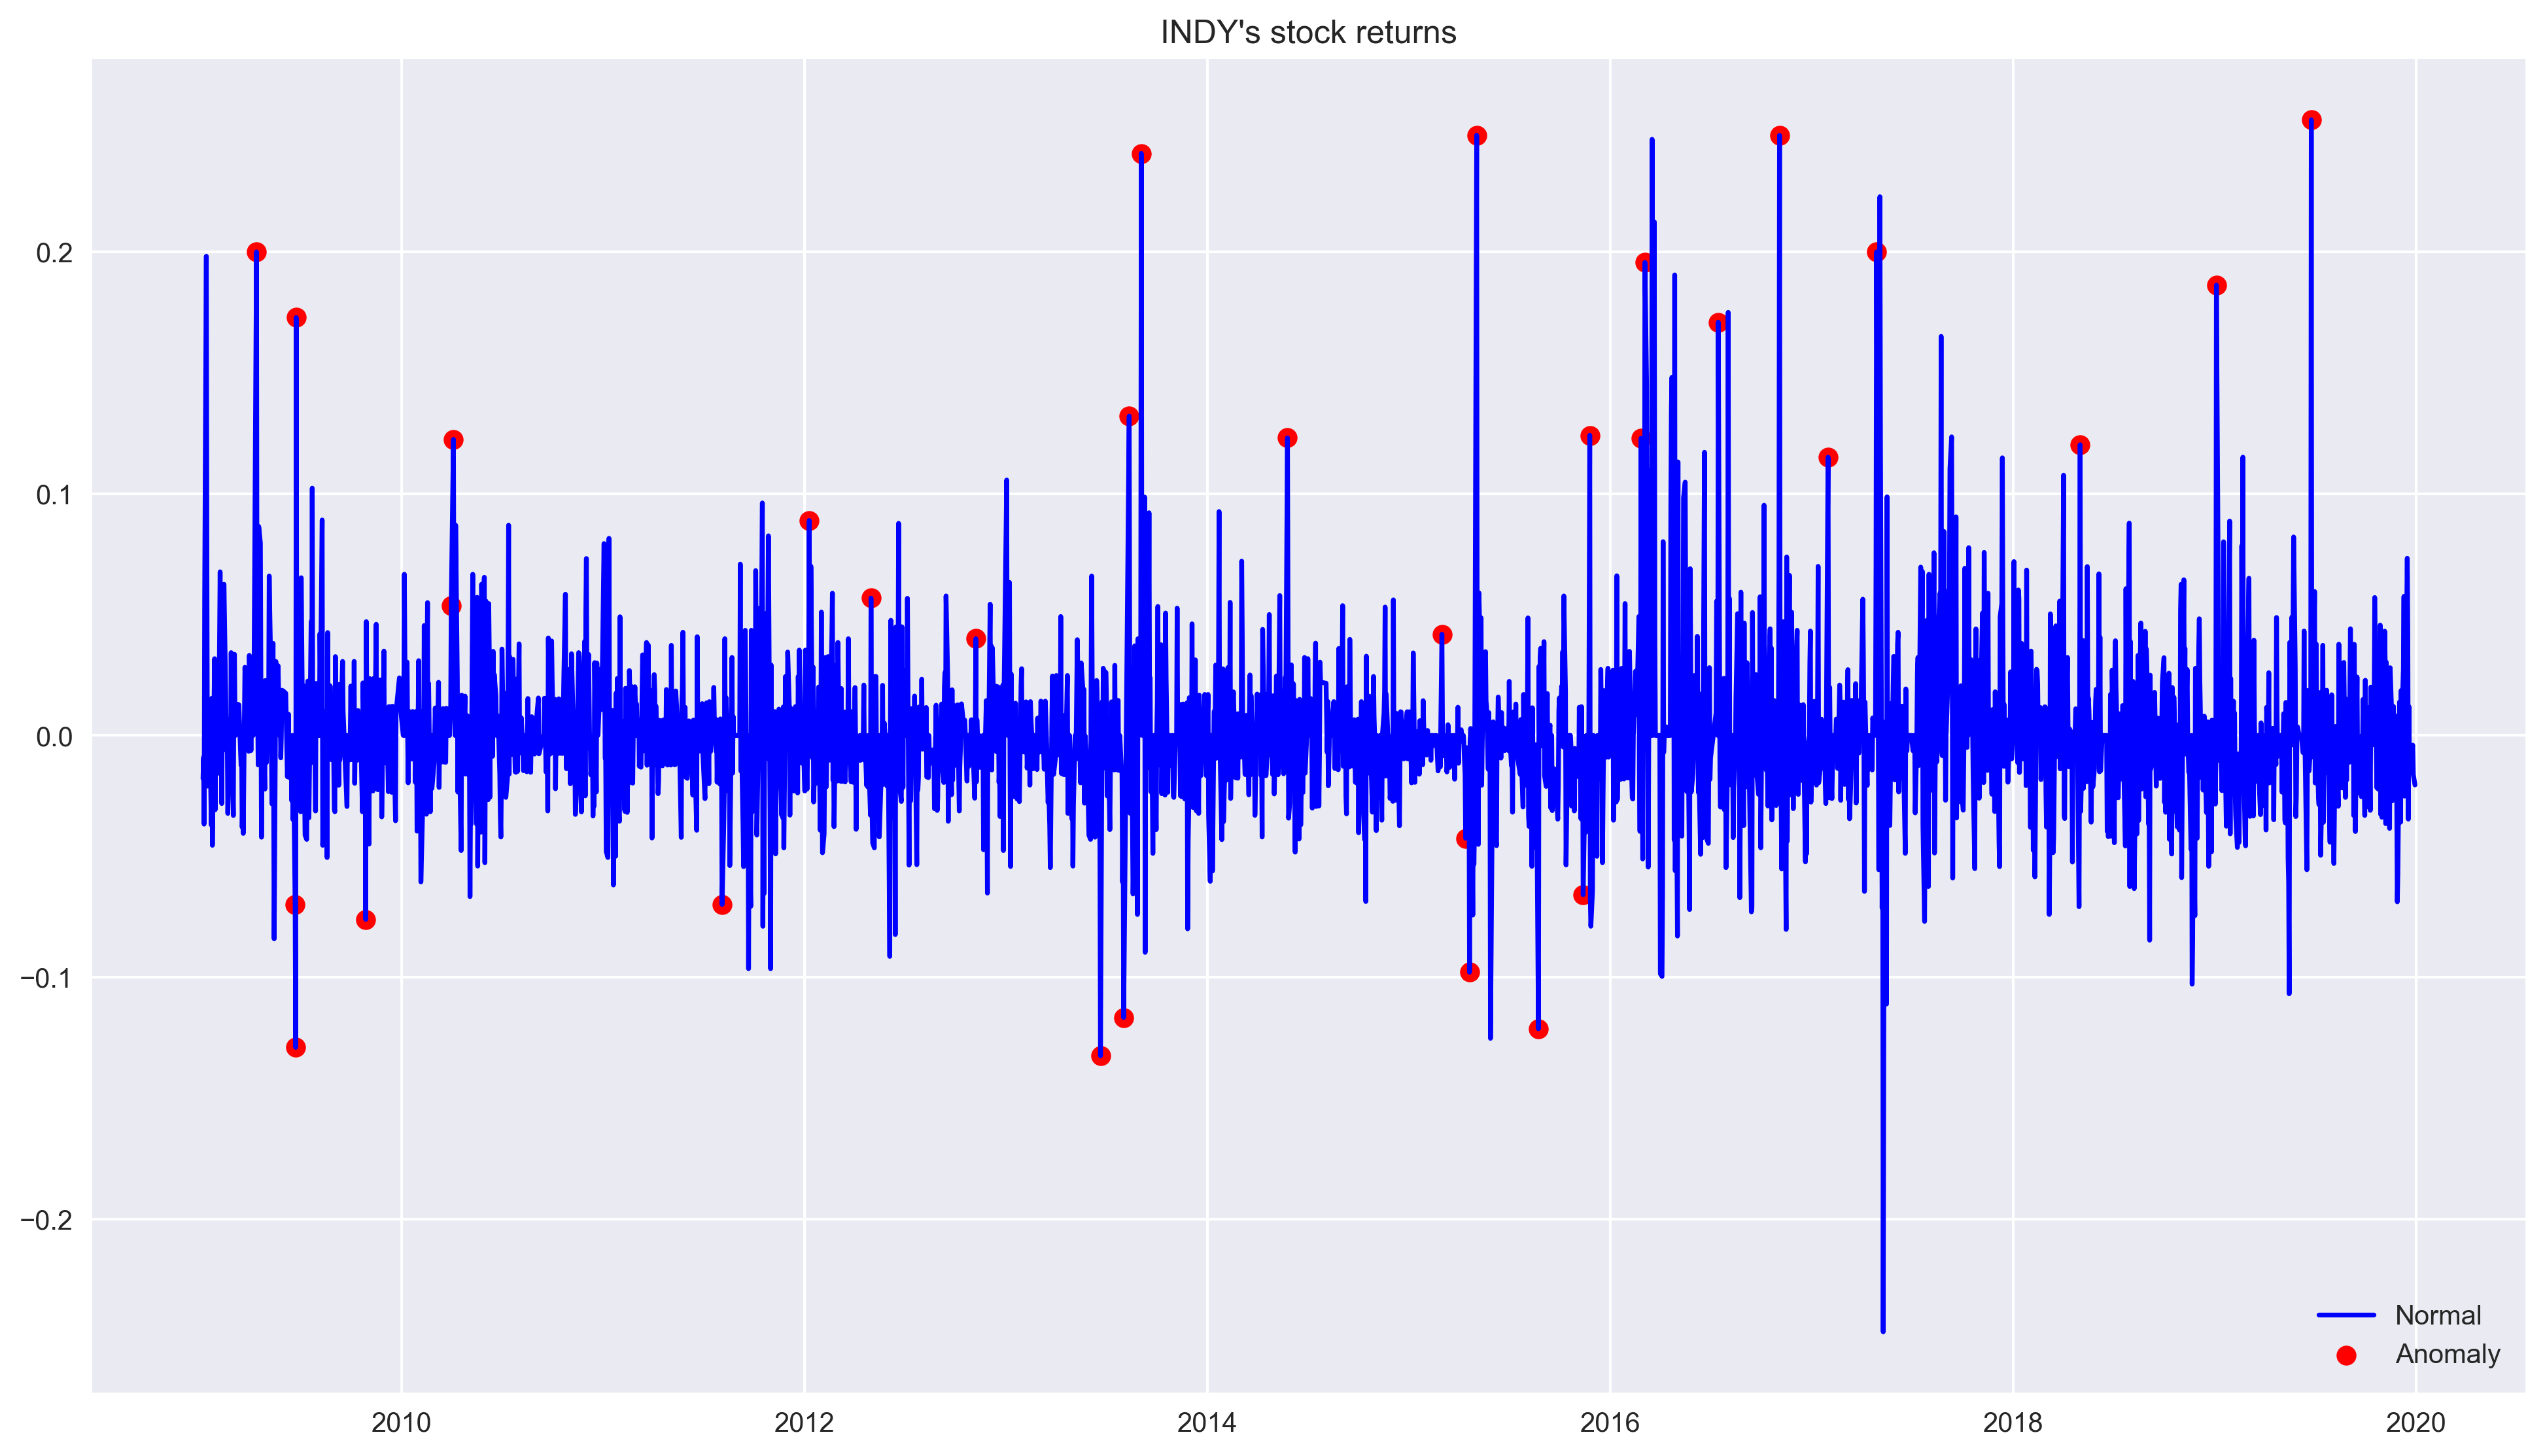

In [39]:
fig, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers.simple_rtn, 
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='red', label='Anomaly')
ax.set_title("INDY's stock returns")
ax.legend(loc='lower right')

plt.show()